# Explooringn sakila databas
## loading the data

In [1]:
import duckdb

def duckdb_query(query, path_to_duckdb="sakila/sakiola.duckdb"): #did a function
    with duckdb.connect("sakila/sakila.duckdb") as duck:
     data = duck.sql(query).df()
     return data
    
duckdb_query("""FROM staging.film;""").head(3)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,_dlt_load_id,_dlt_id
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,1764842500.1806562,jKxhPVjSrkVLag
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00,1764842500.1806562,dOQMcx/01Z9s+A
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00,1764842500.1806562,qlcrmeALIQOefw


Task 1 EDA


a) Which movies are longer than 3 hours (180 minutes), show the title and its length?

First i did a info just to se 

In [2]:
duckdb_query( """ 
SELECT 
    title, 
    length  
FROM staging.film  
WHERE length > 180;         
"""
)



,title,length
0,ANALYZE HOOSIERS,181
1,BAKED CLEOPATRA,182
2,CATCH AMISTAD,183
3,CHICAGO NORTH,185
4,CONSPIRACY SPIRIT,184
5,CONTROL ANTHEM,185
6,CRYSTAL BREAKING,184
7,DARN FORRESTER,185
8,FRONTIER CABIN,183
9,GANGS PRIDE,185


Task 1, b) Which movies have the word "love" in its title? Show the following columns
    - title
    - rating
    - length
    - description

In [3]:
duckdb_query(""" 
SELECT
    title,
    length,
    rating,
    description                 
FROM staging.film 
WHERE title ILIKE '%love%';
""")

,title,length,rating,description
0,GRAFFITI LOVE,117,PG,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,172,PG-13,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,119,PG-13,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,135,NC-17,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,175,NC-17,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,181,R,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,65,PG,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,75,G,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,162,PG-13,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,103,NC-17,A Awe-Inspiring Panorama of a Lumberjack And a...


Task 1, c) Calculate descriptive statistics on the length column, The Manager wants, shortest, average, median and
longest movie length

In [4]:
duckdb_query(""" 
SELECT 
     MAX(length) as max_length,
     MIN(length) as min_length,
     MEDIAN(length) as median_length,
     AVG(length) as avrage_lenght
FROM staging.film;
                    
""")

,max_length,min_length,median_length,avrage_lenght
0,185,46,114.0,115.272


d) The rental rate is the cost to rent a movie and the rental duration is the number of days a customer can
keep the movie. The Manager wants to know the 10 most expensive movies to rent per day.


In [5]:
duckdb_query(""" 
SELECT
    title, 
    rental_duration * rental_rate as cost_per_rental          
FROM staging.film
ORDER BY cost_per_rental DESC
LIMIT 10;
""")

,title,cost_per_rental
0,BIKINI BORROWERS,34.93
1,BOILED DARES,34.93
2,BORN SPINAL,34.93
3,BOWFINGER GABLES,34.93
4,BROOKLYN DESERT,34.93
5,BUCKET BROTHERHOOD,34.93
6,CHAMBER ITALIAN,34.93
7,CHASING FIGHT,34.93
8,CHINATOWN GLADIATOR,34.93
9,COLDBLOODED DARLING,34.93


e) Which actors have played in most movies? Show the top 10 actors with the number of movies they have
played in.

In [6]:
duckdb_query(""" 
SELECT 
    a.actor_id,
    ab.last_name,
    ab.first_name,
    COUNT(*) as amount_movies
FROM staging.film_actor a
LEFT JOIN staging.actor ab ON  a.actor_id = ab.actor_id
GROUP BY a.actor_id, ab.last_name, ab.first_name 
ORDER BY amount_movies DESC
LIMIT 10;            

""")

,actor_id,last_name,first_name,amount_movies
0,107,DEGENERES,GINA,42
1,102,TORN,WALTER,41
2,198,KEITEL,MARY,40
3,181,CARREY,MATTHEW,39
4,23,KILMER,SANDRA,37
5,81,DAMON,SCARLETT,36
6,144,WITHERSPOON,ANGELA,35
7,158,BASINGER,VIVIEN,35
8,13,WOOD,UMA,35
9,60,BERRY,HENRY,35


(I used LLM to get these questions)

f)Which movies have been rented out the most, top 5?

In [7]:
duckdb_query(""" 
SELECT 
    a.actor_id,
    ab.last_name,
    ab.first_name, 
    COUNT(*) as amount_movies
FROM staging.film_actor a
LEFT JOIN staging.actor ab ON  a.actor_id = ab.actor_id
GROUP BY a.actor_id, ab.last_name, ab.first_name 
ORDER BY amount_movies DESC
LIMIT 10; 
""")

,actor_id,last_name,first_name,amount_movies
0,107,DEGENERES,GINA,42
1,102,TORN,WALTER,41
2,198,KEITEL,MARY,40
3,181,CARREY,MATTHEW,39
4,23,KILMER,SANDRA,37
5,81,DAMON,SCARLETT,36
6,158,BASINGER,VIVIEN,35
7,13,WOOD,UMA,35
8,144,WITHERSPOON,ANGELA,35
9,106,DUNST,GROUCHO,35


g) Which customer have the top 5 highest rental rate?

In [8]:
duckdb_query(""" 
SELECT 
    a.customer_id,
    COUNT(rental_id) AS amount_of_rentals             
FROM staging.rental ab
LEFT JOIN staging.customer a ON a.customer_id = ab.customer_id
GROUP BY a.customer_id
ORDER BY amount_of_rentals DESC
LIMIT 5;           
""")

,customer_id,amount_of_rentals
0,148,46
1,526,45
2,144,42
3,236,42
4,75,41


h)  How many movies are in each stores?

In [9]:
duckdb_query(""" 
SELECT 
    store_id,
    COUNT(*) AS amount_of_movies             
FROM staging.inventory
GROUP BY store_id
ORDER BY amount_of_movies;
             
""")

,store_id,amount_of_movies
0,1,2270
1,2,2311


i) Which catagory has the most films? 

In [10]:
duckdb_query(""" 
SELECT 
    a.name,
    a.category_id,
   COUNT(*) as amount_of_moives                 
FROM staging.film_category ab
LEFT JOIN staging.category a ON a.category_id = ab.category_id
GROUP BY a.name, a.category_id
ORDER BY amount_of_moives;
""")

,name,category_id,amount_of_moives
0,Music,12,51
1,Horror,11,56
2,Travel,16,57
3,Classics,4,57
4,Comedy,5,58
5,Children,3,60
6,Games,10,61
7,Sci-Fi,14,61
8,Drama,7,62
9,New,13,63


# Graphs

a) Who are our top 5 customers by total spend? Create a bar chart showing the top 5 customers by total spend

In [24]:
df = duckdb_query("""
SELECT
    ab.first_name || ' ' || ab.last_name AS customer,
    SUM(a.amount) as total_amount
FROM staging.payment a
JOIN staging.customer ab ON a.customer_id = ab.customer_id
GROUP BY  customer
ORDER BY total_amount desc
LIMIT 5;""")

df

,customer,total_amount
0,KARL SEAL,221.55
1,ELEANOR HUNT,216.54
2,CLARA SHAW,195.58
3,RHONDA KENNEDY,194.61
4,MARION SNYDER,194.61


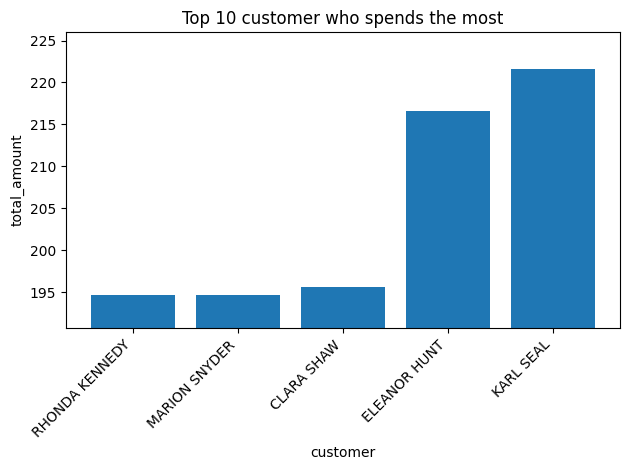

In [34]:
import matplotlib.pyplot as plt

df = duckdb_query("""
SELECT
    ab.first_name || ' ' || ab.last_name AS customer,
    SUM(a.amount) as total_amount
FROM staging.payment a
JOIN staging.customer ab ON a.customer_id = ab.customer_id
GROUP BY  customer
ORDER BY total_amount desc
LIMIT 5;""")

fig, ax =  plt.subplots()
ax.bar(df["customer"], df["total_amount"])
y_ax_min=df["total_amount"].min() * 0.98 # used LLM on how to scale
y_ax_max=df["total_amount"].max() * 1.02
ax.set_ylim(y_ax_min, y_ax_max)
ax.set(
xlabel = "customer", 
ylabel = "total_amount",
title ="Top 10 customer who spends the most",
)
ax.invert_xaxis()
plt.xticks(rotation=45, ha='right') #used LLM on how to rotate
fig.tight_layout()
plt.show()
fig.savefig("paying_customer.png", dpi = 100)

b) How much money does each film category bring in? Make a bar chart showing total revenue per film
category.

In [ ]:
dfs = duckdb_query(""" 
SELECT 
    c.name as category,
    SUM(p.amount) as total_amount                
FROM staging.category c
JOIN staging.film_category fa ON fa.category_id = c.category_id
JOIN staging.film fi ON fi.film_id = fa.film_id
JOIN staging.inventory id ON id.film_id = fi.film_id
JOIN staging.rental r ON r.inventory_id = id.inventory_id
JOIN staging.payment p ON p.rental_id = r.rental_id
GROUP BY c.name
ORDER BY total_amount; 
    
""")
dfs

,category,total_amount
0,Music,3417.72
1,Travel,3549.64
2,Classics,3639.59
3,Children,3655.55
4,Horror,3722.54
5,Documentary,4217.52
6,Family,4226.07
7,Foreign,4270.67
8,Games,4281.33
9,New,4351.62
